##### Imports

In [26]:
import cv2
import numpy as np
# import mediapipe as mp
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.callbacks import TensorBoard
import seaborn as sns
import tensorflow_addons as tfa

#### Get Data

##### Note: I'm accessing my data from my computer, however it is the same as the zip file here

In [50]:
def getClasses(gesture_file):
    f = open('gesture.names', 'r')
    cn = f.read().split('\n')
    f.close()
    return cn

classNames = getClasses('gesture.names')
label_map = {label:num for num, label in enumerate(classNames)}
res_dir = "/Users/williambacon/Desktop/ASL_DataCapture/pipeline/new-data"
print(res_dir)
print(label_map)

/Users/williambacon/Desktop/ASL_DataCapture/pipeline/new-data
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [51]:
sequence_length = 10
sequences, labels = [], []
for action in classNames:
	class_dir_r = os.path.join(res_dir, action)
	values_r = os.listdir(class_dir_r)
	for vr in values_r:
		if vr == '.DS_Store':
			continue
		window = []
		for frame_num in range(sequence_length):
			# print(os.path.join(res_dir, action, vr, "{}_f{}.npy".format(vr,frame_num)))
			targ_path = os.path.join(res_dir, action, vr, "{}_f{}.npy".format(vr,frame_num))
			if os.path.exists(targ_path):
				res = np.load(targ_path)
				window.append(res)
		if len(window) == sequence_length:
			sequences.append(window)
			labels.append(label_map[action])

In [52]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
actions = np.array(classNames)

#### Building Function

In [53]:
def build_model(params,name):
    print(name)
    model = Sequential()
    model.add(LSTM(params[0], return_sequences=True, activation='relu', input_shape=(10,126) ))
    model.add(LSTM(params[1], return_sequences=True, activation='relu'))
    model.add(LSTM(params[2], return_sequences=False, activation='relu'))
    model.add(Dense(params[3], activation='relu'))
    model.add(Dense(params[4], activation='relu'))
    model.add(Dense(actions.shape[0], activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    model.fit(X_train, y_train, epochs = 8, callbacks=[tb_callback])
    return model

In [55]:
lstmParams = {}
lstmParams['lstm1'] = [8,8,8,8,8]
lstmParams['lstm2'] = [16,16,16,16,16]
lstmParams['lstm3'] = [32,32,32,32,32]
lstmParams['lstm4'] = [64,64,64,64,64]
lstmParams['lstm5'] = [128,128,128,128,128]
lstmParams['lstm6'] = [64,128,128,128,128]
lstmParams['lstm7'] = [128,64,128,128,128]
lstmParams['lstm8'] = [128,128,64,128,128]
lstmParams['lstm9'] = [128,128,128,64,128]
lstmParams['lstm10'] = [128,128,128,128,64]
lstmParams['lstm11'] = [64,128,64,128,128]
lstmParams['lstm12'] = [128,64,64,128,128]
lstmParams['lstm13'] = [128,128,32,128,128]
lstmParams['lstm14'] = [128,128,64,64,128]
lstmParams['lstm15'] = [128,128,64,128,64]
lstmParams['lstm16'] = [64,128,64,64,32]

In [56]:
model_dict = {}
for key in lstmParams.keys():
    model_dict[key] = build_model(lstmParams[key],key)


lstm1
Epoch 1/8
959/959 [==============================] - 8s 6ms/step - loss: 2.4928 - categorical_accuracy: 0.2423
Epoch 2/8
959/959 [==============================] - 6s 6ms/step - loss: 1.6892 - categorical_accuracy: 0.4198
Epoch 3/8
959/959 [==============================] - 5s 6ms/step - loss: 1.5251 - categorical_accuracy: 0.4739
Epoch 4/8
959/959 [==============================] - 5s 6ms/step - loss: 1.4298 - categorical_accuracy: 0.4969
Epoch 5/8
959/959 [==============================] - 5s 6ms/step - loss: 1.3178 - categorical_accuracy: 0.5231
Epoch 6/8
959/959 [==============================] - 5s 6ms/step - loss: 1.2412 - categorical_accuracy: 0.5534
Epoch 7/8
959/959 [==============================] - 6s 6ms/step - loss: 2.1689 - categorical_accuracy: 0.3245
Epoch 8/8
959/959 [==============================] - 6s 6ms/step - loss: 2.1252 - categorical_accuracy: 0.3391
lstm2
Epoch 1/8
959/959 [==============================] - 8s 6ms/step - loss: 2.8940 - categorical_accura

959/959 [==============================] - 15s 14ms/step - loss: 1.4315 - categorical_accuracy: 0.5999
Epoch 2/8
959/959 [==============================] - 14s 14ms/step - loss: 0.5972 - categorical_accuracy: 0.8100
Epoch 3/8
959/959 [==============================] - 13s 14ms/step - loss: 0.4572 - categorical_accuracy: 0.8555
Epoch 4/8
959/959 [==============================] - 13s 14ms/step - loss: 0.4081 - categorical_accuracy: 0.8717
Epoch 5/8
959/959 [==============================] - 13s 14ms/step - loss: 0.8741 - categorical_accuracy: 0.7262
Epoch 6/8
959/959 [==============================] - 13s 13ms/step - loss: 0.5347 - categorical_accuracy: 0.8221
Epoch 7/8
959/959 [==============================] - 13s 13ms/step - loss: 0.3993 - categorical_accuracy: 0.8618
Epoch 8/8
959/959 [==============================] - 13s 14ms/step - loss: 0.4279 - categorical_accuracy: 0.8599
lstm11
Epoch 1/8
959/959 [==============================] - 12s 10ms/step - loss: 2.2680 - categorical_acc

In [57]:
for key in model_dict.keys(): print(key)

lstm1
lstm2
lstm3
lstm4
lstm5
lstm6
lstm7
lstm8
lstm9
lstm10
lstm11
lstm12
lstm13
lstm14
lstm15
lstm16


#### Have a variety of model tuning options, now need testing data
###### Note: All models are LSTM because while other alternatives worked, especially GRU which seemed to outperform LSTM slightly during some early testing, LSTM was the only option that could convert to a coreml model after. Since coreml is the model type used in iOS development, the ability to convert was crucial.

In [58]:
res_dir = "/Users/williambacon/Desktop/ASL_DataCapture/pipeline/test_data"

In [59]:
sequence_length = 10
sequences, labels = [], []
for action in classNames:
	class_dir_r = os.path.join(res_dir, action)
	values_r = os.listdir(class_dir_r)
	for vr in values_r:
		if vr == '.DS_Store':
			continue
		window = []
		for frame_num in range(sequence_length):
			# print(os.path.join(res_dir, action, vr, "{}_f{}.npy".format(vr,frame_num)))
			targ_path = os.path.join(res_dir, action, vr, "{}_f{}.npy".format(vr,frame_num))
			if os.path.exists(targ_path):
				res = np.load(targ_path)
				window.append(res)
		if len(window) == sequence_length:
			sequences.append(window)
			labels.append(label_map[action])

In [60]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [61]:
def test_model(name, model):
    results = model.evaluate(X, y)
    predictions = model.predict(X)
    ypred = np.argmax(predictions, axis=1)
    ypred_lab = actions[ypred]
    ymax = np.argmax(y, axis=1)
    y_reshape = ymax.reshape((26,20))
    y_pred_reshape = ypred.reshape((26,20))
    cmat = tf.math.confusion_matrix(labels=ymax, predictions=ypred).numpy()
    plt.figure(figsize = (7,7))
    ax = sns.heatmap(cmat, annot=True , cmap='rocket',annot_kws={"size": 8},square=False)

    ax.set_title(name);
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual');

    ax.xaxis.set_ticklabels(actions)
    ax.yaxis.set_ticklabels(actions)
    metric = tfa.metrics.F1Score(num_classes=26)
    metric.update_state(y, predictions)
    res = metric.result()
    plt.show()
    return res

17/17 [==============================] - 0s 2ms/step - loss: 2.0494 - categorical_accuracy: 0.2500


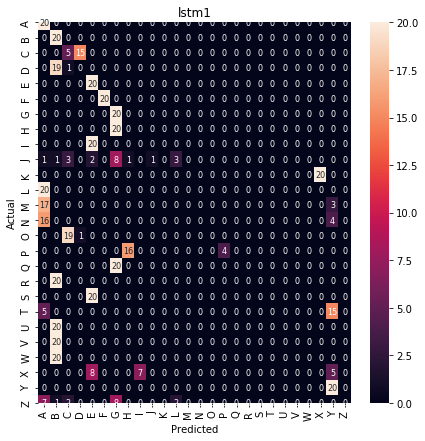

17/17 [==============================] - 0s 2ms/step - loss: 0.9813 - categorical_accuracy: 0.6731


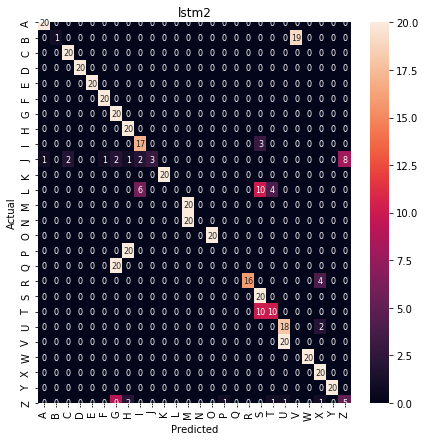

17/17 [==============================] - 0s 2ms/step - loss: 0.2795 - categorical_accuracy: 0.9385


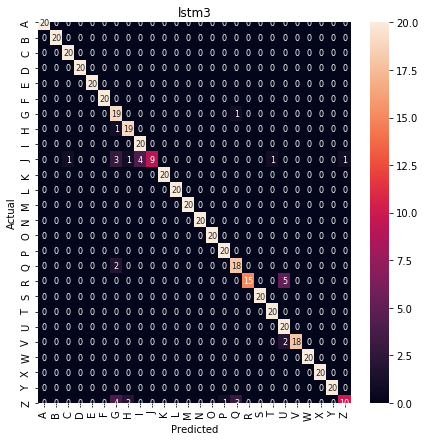

17/17 [==============================] - 0s 3ms/step - loss: 0.4315 - categorical_accuracy: 0.8712


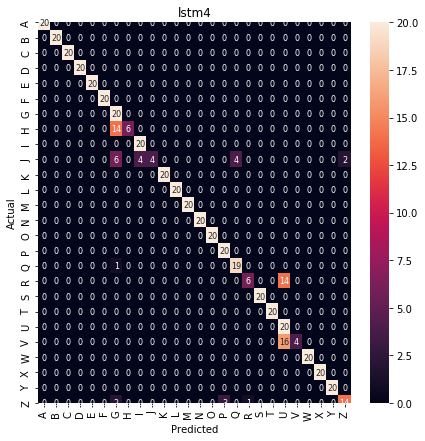

17/17 [==============================] - 0s 5ms/step - loss: 0.2372 - categorical_accuracy: 0.9481


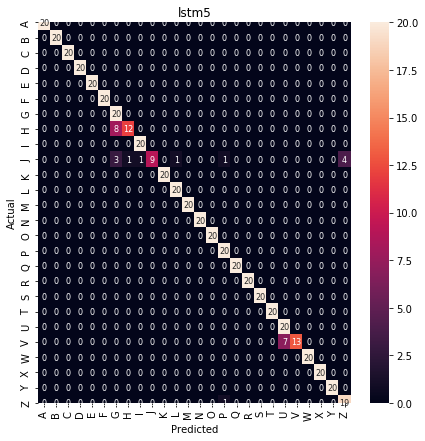

17/17 [==============================] - 0s 5ms/step - loss: 0.3060 - categorical_accuracy: 0.9058


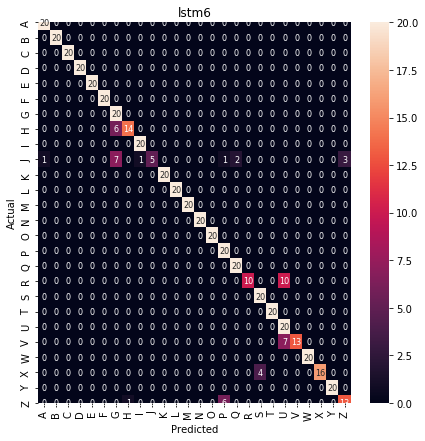

17/17 [==============================] - 0s 4ms/step - loss: 0.2790 - categorical_accuracy: 0.9231


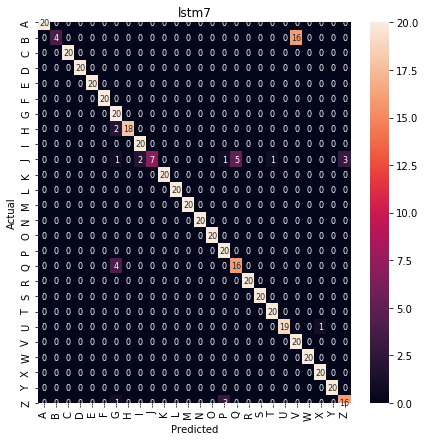

17/17 [==============================] - 0s 5ms/step - loss: 0.9174 - categorical_accuracy: 0.6577


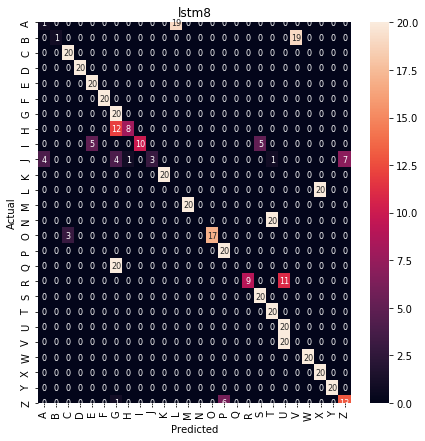

17/17 [==============================] - 0s 5ms/step - loss: 0.4360 - categorical_accuracy: 0.8904


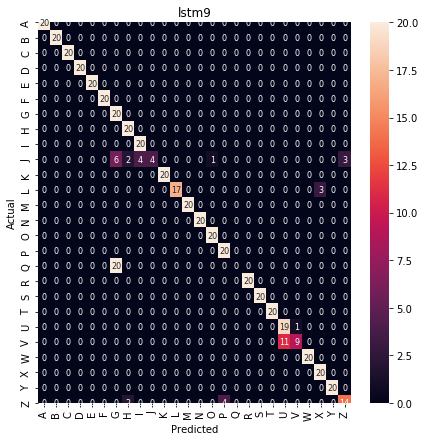

17/17 [==============================] - 0s 5ms/step - loss: 1.1286 - categorical_accuracy: 0.5692


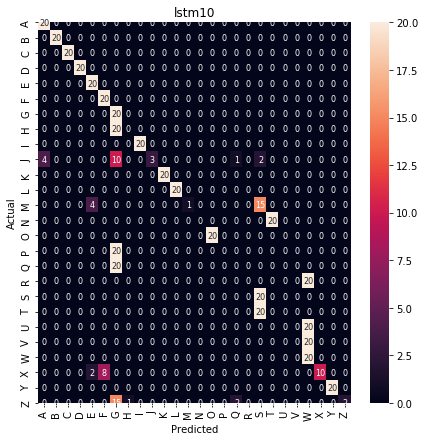

17/17 [==============================] - 0s 5ms/step - loss: 0.4907 - categorical_accuracy: 0.8577


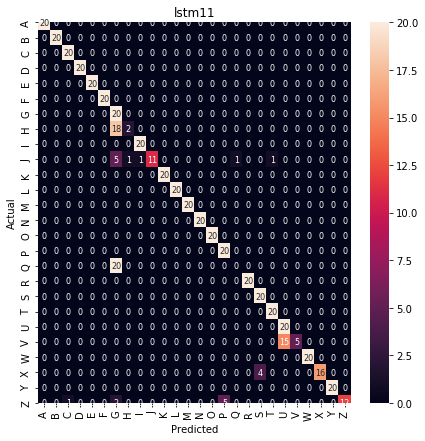

17/17 [==============================] - 0s 4ms/step - loss: 0.2870 - categorical_accuracy: 0.9096


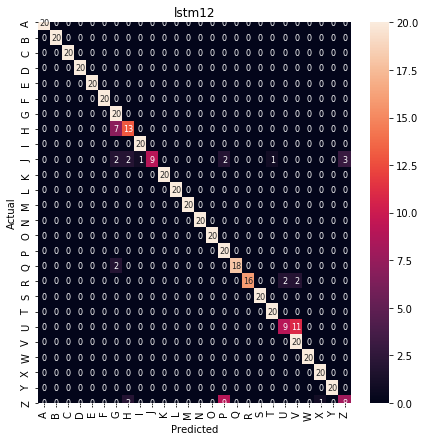

17/17 [==============================] - 0s 5ms/step - loss: 0.3541 - categorical_accuracy: 0.9000


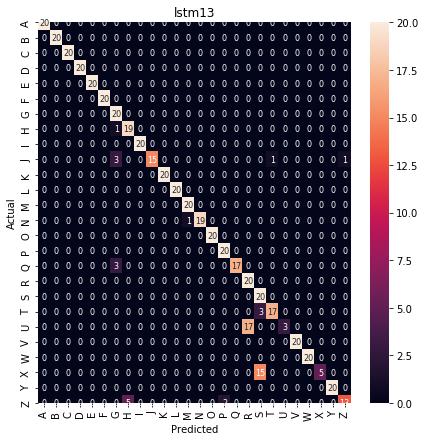

17/17 [==============================] - 0s 5ms/step - loss: 0.3706 - categorical_accuracy: 0.8942


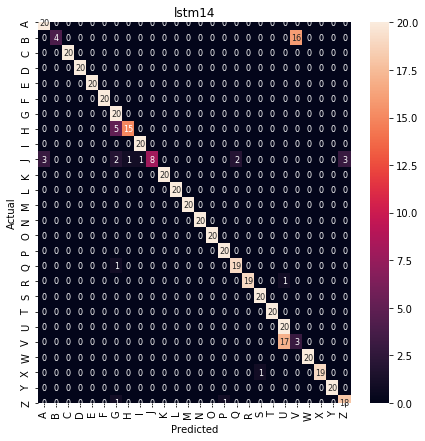

17/17 [==============================] - 0s 5ms/step - loss: 0.2528 - categorical_accuracy: 0.9192


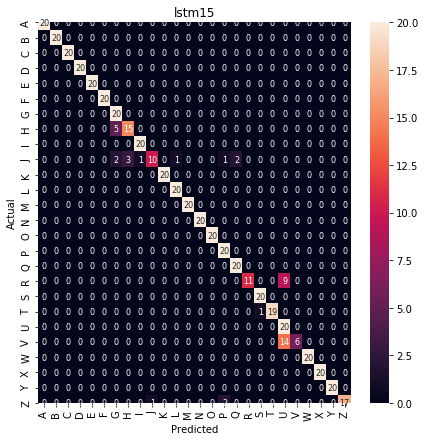

17/17 [==============================] - 0s 4ms/step - loss: 0.2325 - categorical_accuracy: 0.9442


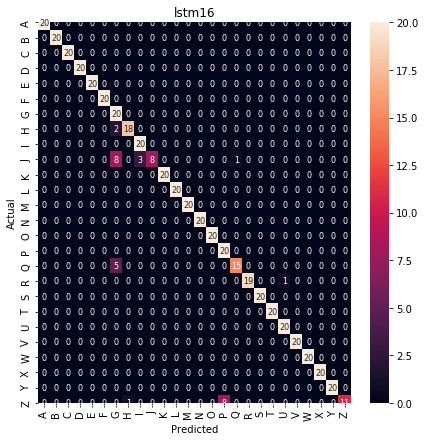

In [62]:
result_dic = {}
for key in model_dict.keys():
    result_dic[key] = test_model(key, model_dict[key])

In [63]:
def get_avg(res_list):
    return sum(res_list)/26

In [64]:
avg_dic = {}
for key in result_dic.keys():
    avg_dic[key] = get_avg(result_dic[key].numpy().tolist())

In [65]:
sorted_vals = dict(sorted(avg_dic.items(), key=lambda item: item[1], reverse = True)) 
for key in sorted_vals.keys():
	print("{}: {}".format(key, sorted_vals[key]))

lstm5: 0.9445592348392193
lstm16: 0.9414739838013282
lstm3: 0.9344138892797323
lstm15: 0.9151752316034757
lstm7: 0.9128803977599511
lstm12: 0.9040999114513397
lstm6: 0.8994570454725852
lstm13: 0.8886474416806147
lstm14: 0.8849454229840865
lstm9: 0.869545565201686
lstm4: 0.8569161926324551
lstm11: 0.8401980657990162
lstm8: 0.6087287644354197
lstm2: 0.6053743528632017
lstm10: 0.5021562547637866
lstm1: 0.1441439986228943


#### models 3, 5, 16 look the most promising so I will move forward with those, I will also continue with 7 as it may improve with more data